In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [5]:
originalDF = pd.read_csv('earthquakes.csv')

In [7]:
# originalDF

In [9]:
originalDF[originalDF.duplicated()].shape

(337, 43)

In [11]:
earthquakes=originalDF.drop_duplicates(keep='first')
print(earthquakes.shape)

(800, 43)


In [16]:
earthquakeDF_withoutDuplicate=originalDF.drop_duplicates(keep='first')

In [18]:
print("shape of original Data is ===================>",originalDF.shape)
print("shape of duplicate records ==================>",originalDF[originalDF.duplicated()].shape)
print("shape after deleteing duplicate records =====>",earthquakeDF_withoutDuplicate.shape)


shape of original Data is ===================> (1137, 43)
shape of duplicate records ==================> (337, 43)
shape after deleteing duplicate records =====> (800, 43)


In [20]:
# 2. Dropped unwanted Columns and checked the shape after Dropping
eqafterDelete = earthquakeDF_withoutDuplicate.drop(['magType','place','sources','types','placeOnly','title','time','updated','status','continent','country','subnational','city','id','type','url','detailUrl','code','ids','geometryType','what3words','locationDetails','postcode','timezone'], axis=1)
print(eqafterDelete.shape)
# eqafterDelete

(800, 19)


In [22]:
missing_values = eqafterDelete.isnull().sum()/eqafterDelete.shape[0]*100
missing_values = missing_values.apply(lambda x: f"{x:.2f}%")
missing_values

magnitude      0.00%
date           0.00%
felt           0.00%
cdi            0.00%
mmi            0.00%
alert         34.75%
tsunami        0.00%
sig            0.00%
net            0.00%
nst            0.00%
dmin           0.00%
rms            0.00%
gap            0.00%
depth          0.00%
latitude       0.00%
longitude      0.00%
distanceKM     0.00%
location       0.00%
locality       0.00%
dtype: object

In [24]:
eqafterDelete['alert'] = eqafterDelete['alert'].fillna(eqafterDelete['alert'].mode()[0])
eqafterDelete['alert'] 

0        green
1        green
2        green
3        green
4        green
         ...  
1124     green
1125    yellow
1126     green
1127     green
1135     green
Name: alert, Length: 800, dtype: object

In [26]:
#Perfoming One Hot Encoding on Alert Feature.
one_hot = pd.get_dummies(eqafterDelete['alert'], prefix='alert')
final = pd.concat([eqafterDelete, one_hot], axis=1)
earthquakesDF=final.drop(columns=['alert'], axis=1)
# earthquakesDF.sample(10)

In [28]:
def replace_boolean_with_int(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].replace({True: 1, False: 0})
    return df
earthquakesDFAfte4zero = replace_boolean_with_int(earthquakesDF, ['alert_green', 'alert_orange','alert_red','alert_yellow'])
# earthquakesDF

In [30]:
earthquakesDFAfte4zero.sample(10)

magnitude                 date  felt  cdi  mmi  tsunami  sig net  nst  \
843        3.6  2024-08-14T07:12:30     3    4    4        0  201  us   47   
427        3.8  2024-05-10T20:31:54     1    3    4        0  222  tx   42   
114        5.5  2024-01-22T19:36:47     2    5    7        0  466  us  133   
324        3.5  2024-08-08T15:17:00     0    0    2        0  188  us   21   
43         3.0  2024-08-23T13:43:06     2    2    3        0  139  nn   15   
245        5.8  2023-07-06T00:31:56     6    3    4        0  519  us  270   
53         3.6  2024-08-10T13:34:46     1    2    4        0  200  us   25   
285        3.1  2024-09-05T01:46:36    47    3    3        0  162  ak    0   
230        5.6  2023-12-21T16:21:52    21    6    6        0  494  us  271   
58         3.5  2024-08-07T06:52:28     3    2    4        0  189  ci   95   

        dmin  ...     depth  latitude  longitude  distanceKM  \
843  0.12700  ...    5.0000   32.7843  -100.6670          18   
427  0.10000  ...    6.1383   31.6670  -104.1960          54   
114  0.43200  ...   10.0000   41.1979    78.6168         128   
324  0.66500  ...   35.0000   51.6689  -174.8640          73   
43   0.06400  ...    6.0000   38.6871  -118.5610          17   
245  0.93300  ...  135.0000  -23.9264   -67.9077         108   
53   0.28300  ...    0.7390   31.7045  -101.7120          28   
285  0.00000  ...   12.1000   61.4837  -149.9430           1   
230  0.40400  ...   61.7080  -21.9025   -70.2778          21   
58   0.04646  ...   12.0600   35.1037  -119.1010          24   

                        location              locality alert_green  \
843             Hermleigh, Texas                Snyder           1   
427                 Toyah, Texas      Culberson County           1   
114                 Aykol, China                 Aqchi           1   
324                 Atka, Alaska            Etc/GMT+12           1   
43           Walker Lake, Nevada             Hawthorne           1   
245  San Pedro de Atacama, Chile  San Pedro de Atacama           1   
53            Garden City, Texas           Garden City           1   
285             Big Lake, Alaska              Big Lake           1   
230             Tocopilla, Chile      America/Santiago           1   
58                 Grapevine, CA     Greenfield-Panama           1   

    alert_orange  alert_red  alert_yellow  
843            0          0             0  
427            0          0             0  
114            0          0             0  
324            0          0             0  
43             0          0             0  
245            0          0             0  
53             0          0             0  
285            0          0             0  
230            0          0             0  
58             0          0             0  

[10 rows x 22 columns]

In [32]:
earthquakesDFAfte4zero['date']

0       2024-09-17T00:49:42
1       2024-09-17T00:49:42
2       2024-09-16T11:22:08
3       2024-09-14T17:01:06
4       2024-09-14T17:01:06
               ...         
1124    2023-10-22T01:54:21
1125    2023-10-17T16:26:49
1126    2023-10-17T08:22:11
1127    2023-10-17T05:10:03
1135    2023-10-03T09:21:03
Name: date, Length: 800, dtype: object

In [34]:
earthquakesDFAfte4zero['Date'] = pd.to_datetime(earthquakesDFAfte4zero['date']).dt.date
earthquakesDFAfte4zero['Time'] = pd.to_datetime(earthquakesDFAfte4zero['date']).dt.time
FinalDF=earthquakesDFAfte4zero.drop(columns=['date'], axis=1)
FinalDF.sample(5)

magnitude  felt  cdi  mmi  tsunami  sig net  nst    dmin   rms  ...  \
851        3.50     0    0    4        0  188  us   33  0.1000  0.30  ...   
1001       5.60    35    6    4        0  504  us  122  2.4000  0.78  ...   
1104       5.40   102    8    6        0  534  us  102  3.3260  1.13  ...   
869        3.44     2    3    3        0  183  uu   37  0.1462  0.17  ...   
744        6.70   142    9    8        1  813  us  244  1.6040  1.02  ...   

      longitude  distanceKM                 location       locality  \
851   -104.3860          58  Whites City, New Mexico       Van Horn   
1001   141.1430          21             Iwaki, Japan          Iwaki   
1104    70.6295          31          Karor, Pakistan         Taunsa   
869   -111.5340          17           Mayfield, Utah  Ephraim-Manti   
744    125.0510          32    Kablalan, Philippines    Celebes Sea   

      alert_green alert_orange alert_red  alert_yellow        Date      Time  
851             1            0         0             0  2024-08-03  17:24:28  
1001            1            0         0             0  2024-03-14  15:14:35  
1104            1            0         0             0  2024-09-11  07:27:59  
869             1            0         0             0  2024-07-08  21:00:44  
744             0            0         0             1  2023-11-17  08:14:10  

[5 rows x 23 columns]

In [36]:
FinalDF['locality']=FinalDF['locality'].str.replace('-',' ')
FinalDF

magnitude  felt  cdi  mmi  tsunami   sig net  nst     dmin   rms  ...  \
0           4.8  1893    6    5        0   994  us   37  0.28700  0.48  ...   
1           5.1  2042    6    5        0  1040  tx   24  0.00000  0.10  ...   
2           3.7  1580    4    4        0   591  ci  135  0.03294  0.28  ...   
3           3.9     5    3    4        0   236  tx   38  0.00000  0.10  ...   
4           4.1     4    3    4        0   260  us   28  0.04300  0.26  ...   
...         ...   ...  ...  ...      ...   ...  ..  ...      ...   ...  ...   
1124        5.2    87    4    5        0   453  us  101  1.84800  0.82  ...   
1125        5.3     5    4    7        0   652  us  147  2.77500  0.69  ...   
1126        5.0     2    5    6        0   386  us  115  2.73400  0.74  ...   
1127        5.5     7    4    7        0   468  us  127  2.74800  0.68  ...   
1135        5.7   131    8    7        0   605  us  226  3.93000  0.33  ...   

      longitude  distanceKM                 location             locality  \
0     -102.0440          33           Ackerly, Texas       Tarzan Lenorah   
1     -102.0570          34           Ackerly, Texas       Tarzan Lenorah   
2     -118.8070           6               Malibu, CA  Agoura Hills Malibu   
3     -104.4500          58  Whites City, New Mexico             Van Horn   
4     -104.4730          60  Whites City, New Mexico             Van Horn   
...         ...         ...                      ...                  ...   
1124    84.7191          36         Bharatpur, Nepal           Gandaki 06   
1125    56.0776          62       Bandar Abbas, Iran          دهستان گهره   
1126    56.0903          57       Bandar Abbas, Iran          دهستان گهره   
1127    56.1369          58       Bandar Abbas, Iran          دهستان گهره   
1135    81.2118          39           Dipayal, Nepal       JayaPrithvi 03   

      alert_green alert_orange alert_red  alert_yellow        Date      Time  
0               1            0         0             0  2024-09-17  00:49:42  
1               1            0         0             0  2024-09-17  00:49:42  
2               1            0         0             0  2024-09-16  11:22:08  
3               1            0         0             0  2024-09-14  17:01:06  
4               1            0         0             0  2024-09-14  17:01:06  
...           ...          ...       ...           ...         ...       ...  
1124            1            0         0             0  2023-10-22  01:54:21  
1125            0            0         0             1  2023-10-17  16:26:49  
1126            1            0         0             0  2023-10-17  08:22:11  
1127            1            0         0             0  2023-10-17  05:10:03  
1135            1            0         0             0  2023-10-03  09:21:03  

[800 rows x 23 columns]

### putting label encoder on locality

In [35]:
# FinalDF.info()

In [38]:
# This is my Dependent variable hence performed LabelEncoding.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
FinalDF['locality'] = label_encoder.fit_transform(FinalDF['locality'])


In [40]:
#converted Locality to integer
def convert_float64_to_int64(df, column_name):
    if column_name in df.columns:
        # Convert the column to int64
        df[column_name] = df[column_name].astype(np.int64)
    return df
maineqDF = convert_float64_to_int64(FinalDF, 'locality')
# maineqDF.info()

In [42]:
maineqDF['Date']

0       2024-09-17
1       2024-09-17
2       2024-09-16
3       2024-09-14
4       2024-09-14
           ...    
1124    2023-10-22
1125    2023-10-17
1126    2023-10-17
1127    2023-10-17
1135    2023-10-03
Name: Date, Length: 800, dtype: object

In [44]:
for col in maineqDF.columns:
    print(col, ':', len(maineqDF[col].unique()), 'Label')

magnitude : 86 Label
felt : 139 Label
cdi : 10 Label
mmi : 9 Label
tsunami : 2 Label
sig : 261 Label
net : 11 Label
nst : 232 Label
dmin : 452 Label
rms : 130 Label
gap : 149 Label
depth : 432 Label
latitude : 589 Label
longitude : 590 Label
distanceKM : 173 Label
location : 270 Label
locality : 224 Label
alert_green : 2 Label
alert_orange : 2 Label
alert_red : 2 Label
alert_yellow : 2 Label
Date : 258 Label
Time : 575 Label


In [46]:
maineqDF.net.value_counts().sort_values(ascending=False).head(20)
# maineqDF.net.value_counts().sort_values(ascending=False).head(20).sum()

net
us    553
tx    109
ak     53
ci     39
nn     15
ok     11
nc      7
uu      5
at      4
nm      3
uw      1
Name: count, dtype: int64

In [48]:
top_6_cats = [x for x in maineqDF.net.value_counts().sort_values(ascending=False).head(6).index]
top_6_cats

['us', 'tx', 'ak', 'ci', 'nn', 'ok']

In [50]:
for label in top_6_cats:
    maineqDF[label]=np.where(maineqDF['net']==label,1,0)
maineqDF[['net']+top_6_cats].head(10)

net  us  tx  ak  ci  nn  ok
0  us   1   0   0   0   0   0
1  tx   0   1   0   0   0   0
2  ci   0   0   0   1   0   0
3  tx   0   1   0   0   0   0
4  us   1   0   0   0   0   0
5  ci   0   0   0   1   0   0
6  ci   0   0   0   1   0   0
7  ci   0   0   0   1   0   0
8  ci   0   0   0   1   0   0
9  nn   0   0   0   0   1   0

In [120]:
# maineqDF.sample(5)

In [52]:
def one_hot_top_x(df,variable,top_x_labels):
	for label in top_x_labels:
		df[variable+'_'+label] = np.where(maineqDF[variable]==label,1,0)
one_hot_top_x(maineqDF,'net',top_6_cats)
maineqDF1= maineqDF.drop(['net'], axis=1)
maineqDF1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 1135
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   magnitude     800 non-null    float64
 1   felt          800 non-null    int64  
 2   cdi           800 non-null    int64  
 3   mmi           800 non-null    int64  
 4   tsunami       800 non-null    int64  
 5   sig           800 non-null    int64  
 6   nst           800 non-null    int64  
 7   dmin          800 non-null    float64
 8   rms           800 non-null    float64
 9   gap           800 non-null    float64
 10  depth         800 non-null    float64
 11  latitude      800 non-null    float64
 12  longitude     800 non-null    float64
 13  distanceKM    800 non-null    int64  
 14  location      800 non-null    object 
 15  locality      800 non-null    int64  
 16  alert_green   800 non-null    int64  
 17  alert_orange  800 non-null    int64  
 18  alert_red     800 non-null    int6

In [54]:
maineqDF1['location'].value_counts()
maineqDF1['location']=maineqDF1['location'].str.replace(', ','-')

In [56]:
maineqDF1.location.value_counts().sort_values(ascending=False).head(20)
# maineqDF1.location.value_counts().sort_values(ascending=False).head(20).sum()

location
Whites City-New Mexico      53
Hualien City-Taiwan         46
Izu Islands-Japan region    38
Toyah-Texas                 25
Hermleigh-Texas             24
Falls City-Texas            20
Barcelona-Philippines       19
Atka-Alaska                 16
Anamizu-Japan               14
Nikolski-Alaska             12
Sand Point-Alaska           12
Aykol-China                 12
Aras-asan-Philippines       12
Hinatuan-Philippines        11
Adak-Alaska                 10
Walker Lake-Nevada           9
Port McNeill-Canada          8
Malibu-CA                    7
Garden City-Texas            6
T                            6
Name: count, dtype: int64

In [58]:
top_10_cats = [x for x in maineqDF1.location.value_counts().sort_values(ascending=False).head(15).index]
top_10_cats

['Whites City-New Mexico',
 'Hualien City-Taiwan',
 'Izu Islands-Japan region',
 'Toyah-Texas',
 'Hermleigh-Texas',
 'Falls City-Texas',
 'Barcelona-Philippines',
 'Atka-Alaska',
 'Anamizu-Japan',
 'Nikolski-Alaska',
 'Sand Point-Alaska',
 'Aykol-China',
 'Aras-asan-Philippines',
 'Hinatuan-Philippines',
 'Adak-Alaska']

In [60]:
for label in top_10_cats:
    maineqDF1[label]=np.where(maineqDF1['location']==label,1,0)
maineqDF1[['location']+top_10_cats].head(15)

location  Whites City-New Mexico  Hualien City-Taiwan  \
0            Ackerly-Texas                       0                    0   
1            Ackerly-Texas                       0                    0   
2                Malibu-CA                       0                    0   
3   Whites City-New Mexico                       1                    0   
4   Whites City-New Mexico                       1                    0   
5                Malibu-CA                       0                    0   
6                Malibu-CA                       0                    0   
7                Malibu-CA                       0                    0   
8                Malibu-CA                       0                    0   
9              Hiko-Nevada                       0                    0   
10  Whites City-New Mexico                       1                    0   
11  Whites City-New Mexico                       1                    0   
12  Whites City-New Mexico                       1                    0   
13  Whites City-New Mexico                       1                    0   
14           Thatcher-Utah                       0                    0   

    Izu Islands-Japan region  Toyah-Texas  Hermleigh-Texas  Falls City-Texas  \
0                          0            0                0                 0   
1                          0            0                0                 0   
2                          0            0                0                 0   
3                          0            0                0                 0   
4                          0            0                0                 0   
5                          0            0                0                 0   
6                          0            0                0                 0   
7                          0            0                0                 0   
8                          0            0                0                 0   
9                          0            0                0                 0   
10                         0            0                0                 0   
11                         0            0                0                 0   
12                         0            0                0                 0   
13                         0            0                0                 0   
14                         0            0                0                 0   

    Barcelona-Philippines  Atka-Alaska  Anamizu-Japan  Nikolski-Alaska  \
0                       0            0              0                0   
1                       0            0              0                0   
2                       0            0              0                0   
3                       0            0              0                0   
4                       0            0              0                0   
5                       0            0              0                0   
6                       0            0              0                0   
7                       0            0              0                0   
8                       0            0              0                0   
9                       0            0              0                0   
10                      0            0              0                0   
11                      0            0              0                0   
12                      0            0              0                0   
13                      0            0              0                0   
14                      0            0              0                0   

    Sand Point-Alaska  Aykol-China  Aras-asan-Philippines  \
0                   0            0                      0   
1                   0            0                      0   
2                   0            0                      0   
3                   0            0                      0   
4                   0            0            

In [62]:
def one_hot_top_x(df,variable,top_x_labels):
	for label in top_x_labels:
		df[variable+'_'+label] = np.where(maineqDF1[variable]==label,1,0)
one_hot_top_x(maineqDF1,'location',top_10_cats)
maineqDF2= maineqDF1.drop(['location'], axis=1)
maineqDF3=maineqDF2
maineqDF3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 1135
Data columns (total 63 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   magnitude                          800 non-null    float64
 1   felt                               800 non-null    int64  
 2   cdi                                800 non-null    int64  
 3   mmi                                800 non-null    int64  
 4   tsunami                            800 non-null    int64  
 5   sig                                800 non-null    int64  
 6   nst                                800 non-null    int64  
 7   dmin                               800 non-null    float64
 8   rms                                800 non-null    float64
 9   gap                                800 non-null    float64
 10  depth                              800 non-null    float64
 11  latitude                           800 non-null    float64
 12

In [331]:
# maineqDF3['Date']= maineqDF3['Date'].astype(str).str.replace('-', '').astype('int32')
# maineqDF3['Time']= maineqDF3['Time'].astype(str).str.replace(':', '').astype('int32')
# maineqDF3['Date']= maineqDF3['Date'].astype(str)
# maineqDF3['Time']= maineqDF3['Time'].astype(str)
# dddd= maineqDF3
# dddd['Date']= dddd['Date'].astype(str).str.replace('-', '.').astype(str)
# maineqDF3['Time']= maineqDF3['Time'].astype(str).astype('int32')
# dddd['Date'] = pd.to_datetime(dddd['Date'])
# dddd['Date'] = dddd['Date'].dt.strftime('%Y-%m-%d')
# dddd['Date']= dddd['Date'].astype(str).astype('float32')
maineqDF3['Time']

0       00:49:42
1       00:49:42
2       11:22:08
3       17:01:06
4       17:01:06
          ...   
1124    01:54:21
1125    16:26:49
1126    08:22:11
1127    05:10:03
1135    09:21:03
Name: Time, Length: 800, dtype: object

### ====================================================

### Checking outliers of each impacted Colums

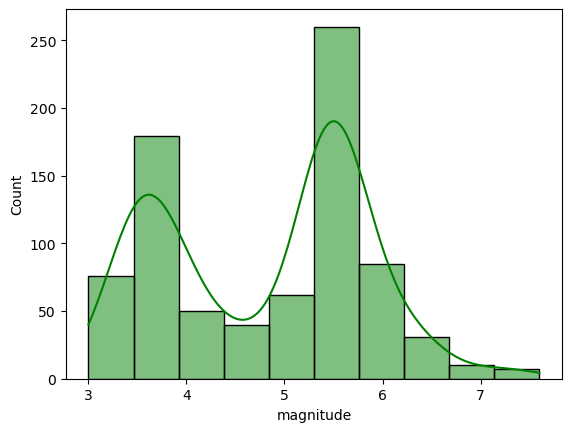

In [64]:
#Histogram to Understand the Distribution
# for i in earthquakeDFFinal.columns:
sns.histplot(data=maineqDF3,x=maineqDF3['magnitude'],kde=True, bins=10, color='green', alpha=0.5)
plt.show()

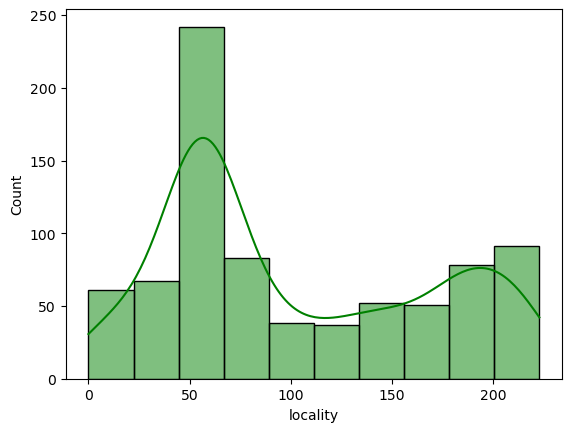

In [66]:
#Histogram to Understand the Distribution
# for i in earthquakeDFFinal.columns:
sns.histplot(data=maineqDF3,x=maineqDF3['locality'],kde=True, bins=10, color='green', alpha=0.5)
plt.show()

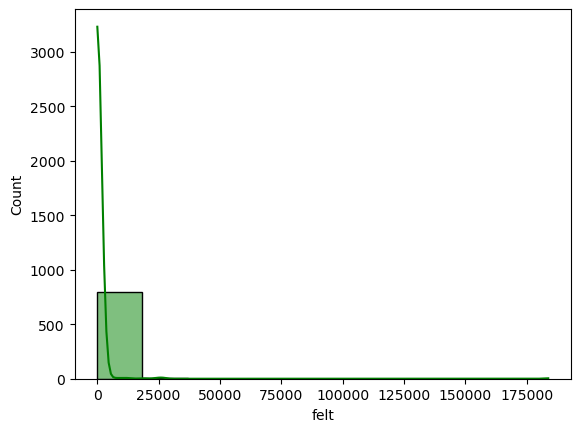

In [68]:
#Histogram to Understand the Distribution
# for i in earthquakeDFFinal.columns:
sns.histplot(data=maineqDF3,x=maineqDF3['felt'],kde=True, bins=10, color='green', alpha=0.5)
plt.show()

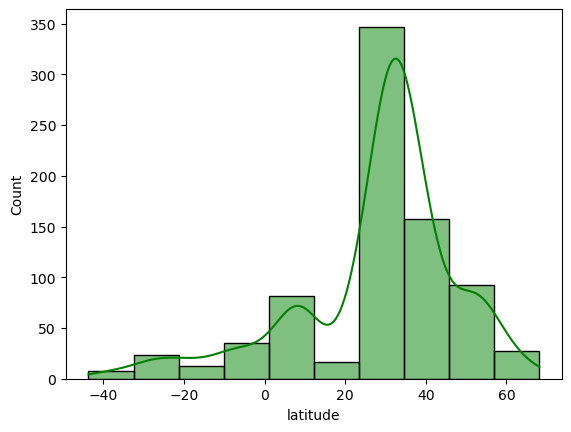

In [137]:
#Histogram to Understand the Distribution
# for i in earthquakeDFFinal.columns:
sns.histplot(data=maineqDF3,x=maineqDF3['latitude'],kde=True, bins=10, color='green', alpha=0.5)
plt.show()

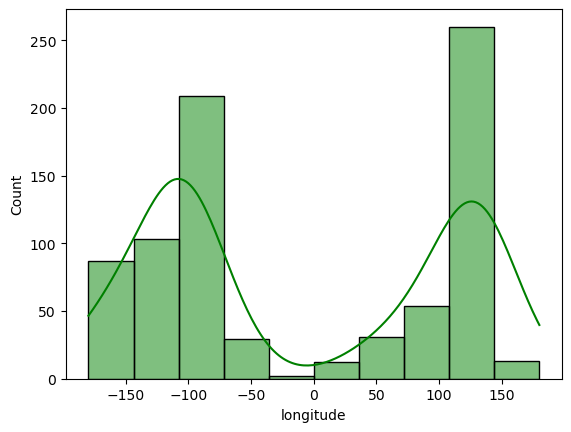

In [70]:
#Histogram to Understand the Distribution
# for i in earthquakeDFFinal.columns:
sns.histplot(data=maineqDF3,x=maineqDF3['longitude'],kde=True, bins=10, color='green', alpha=0.5)
plt.show()

In [162]:
# earthquakeDFFinal['longitude'] = np.log(earthquakeDFFinal['longitude'])

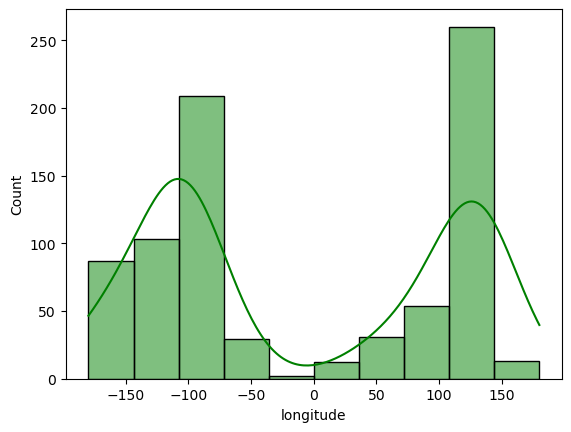

In [72]:
#Histogram to Understand the Distribution
# for i in earthquakeDFFinal.columns:
sns.histplot(data=maineqDF3,x=maineqDF3['longitude'],kde=True, bins=10, color='green', alpha=0.5)
plt.show()

#### ===================================

### Visualization of diffrent parameters

In [76]:
maineqDF3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 1135
Data columns (total 63 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   magnitude                          800 non-null    float64
 1   felt                               800 non-null    int64  
 2   cdi                                800 non-null    int64  
 3   mmi                                800 non-null    int64  
 4   tsunami                            800 non-null    int64  
 5   sig                                800 non-null    int64  
 6   nst                                800 non-null    int64  
 7   dmin                               800 non-null    float64
 8   rms                                800 non-null    float64
 9   gap                                800 non-null    float64
 10  depth                              800 non-null    float64
 11  latitude                           800 non-null    float64
 12

In [78]:
earthquakeDFFinal = maineqDF3
earthquakeDFFinal['Date']

0       2024-09-17
1       2024-09-17
2       2024-09-16
3       2024-09-14
4       2024-09-14
           ...    
1124    2023-10-22
1125    2023-10-17
1126    2023-10-17
1127    2023-10-17
1135    2023-10-03
Name: Date, Length: 800, dtype: object

In [80]:
# maineqDF3['Date']= maineqDF3['Date'].astype(str).str.replace('-', '').astype('int32')
# maineqDF3['Time']= maineqDF3['Time'].astype(str).str.replace(':', '').astype('int32')
maineqDF3['Date']= maineqDF3['Date'].astype(str)
maineqDF3['Time']= maineqDF3['Time'].astype(str)

In [82]:
start_time = '04:00:00'
end_time = '06:00:00'
filtered_df = earthquakeDFFinal[(earthquakeDFFinal['Time'] >= start_time) & (earthquakeDFFinal['Time'] <= end_time)].value_counts().sum()
filtered_df = earthquakeDFFinal[(earthquakeDFFinal['Time'] >= start_time) & (earthquakeDFFinal['Time'] <= end_time)].head(66)
filtered_df
# threshold = 6
# high_magnitude_locations = earthquakeDFFinal[earthquakeDFFinal["magnitude"] >= threshold].head(66)
# high_magnitude_locations.value_counts().sum()

magnitude  felt  cdi  mmi  tsunami  sig  nst     dmin     rms    gap  \
35         3.90    12    3    4        0  237   14  0.06000  0.1836  54.74   
39         3.30     3    2    3        0  168   23  0.05300  0.1688  48.75   
59         3.44   145    5    4        0  252   75  0.04397  0.2500  20.00   
60         3.58    24    5    4        0  209   44  0.03701  0.2600  53.00   
61         4.06   267    5    5        0  387   83  0.05247  0.2900  22.00   
...         ...   ...  ...  ...      ...  ...  ...      ...     ...    ...   
1106       5.10     2    3    5        0  401  176  1.34000  0.6800  70.00   
1107       5.50     0    0    7        0  465  209  6.43800  0.5900  25.00   
1111       5.10     0    0    4        0  400  102  3.52700  0.4300  66.00   
1112       5.40    14    4    6        0  455  133  0.59200  0.7000  30.00   
1127       5.50     7    4    7        0  468  127  2.74800  0.6800  38.00   

      ...  location_Falls City-Texas  location_Barcelona-Philippines  \
35    ...                          0                               0   
39    ...                          0                               0   
59    ...                          0                               0   
60    ...                          0                               0   
61    ...                          0                               0   
...   ...                        ...                             ...   
1106  ...                          0                               0   
1107  ...                          0                               0   
1111  ...                          0                               0   
1112  ...                          0                               0   
1127  ...                          0                               0   

      location_Atka-Alaska  location_Anamizu-Japan  location_Nikolski-Alaska  \
35                       0                       0                         0   
39                       0                       0                         0   
59                       0                       0                         0   
60                       0                       0                         0   
61                       0                       0                         0   
...                    ...                     ...                       ...   
1106                     0                       0                         0   
1107                     0                       0                         0   
1111                     0                       0                         0   
1112                     0                       0                         0   
1127                     0                       0                         0   

      location_Sand Point-Alaska  location_Aykol-China  \
35                             0                     0   
39                             0                     0   
59                             0                     0   
60                             0                     0   
61                             0                     0   
...                          ...                   ...   
1106                           0                     0   
1107                           0                     0   
1111                           0                     0   
1112                           0                     0   
1127                           0                     0   

      location_Aras-asan-Philippines  location_Hinatuan-Philippines  \
35                                 0                              0   
39                                 0                              0   
59                                 0                              0   
60                                 0                              0   
61                                 0                              0   
...                              ...                            ...   
1106                               0             

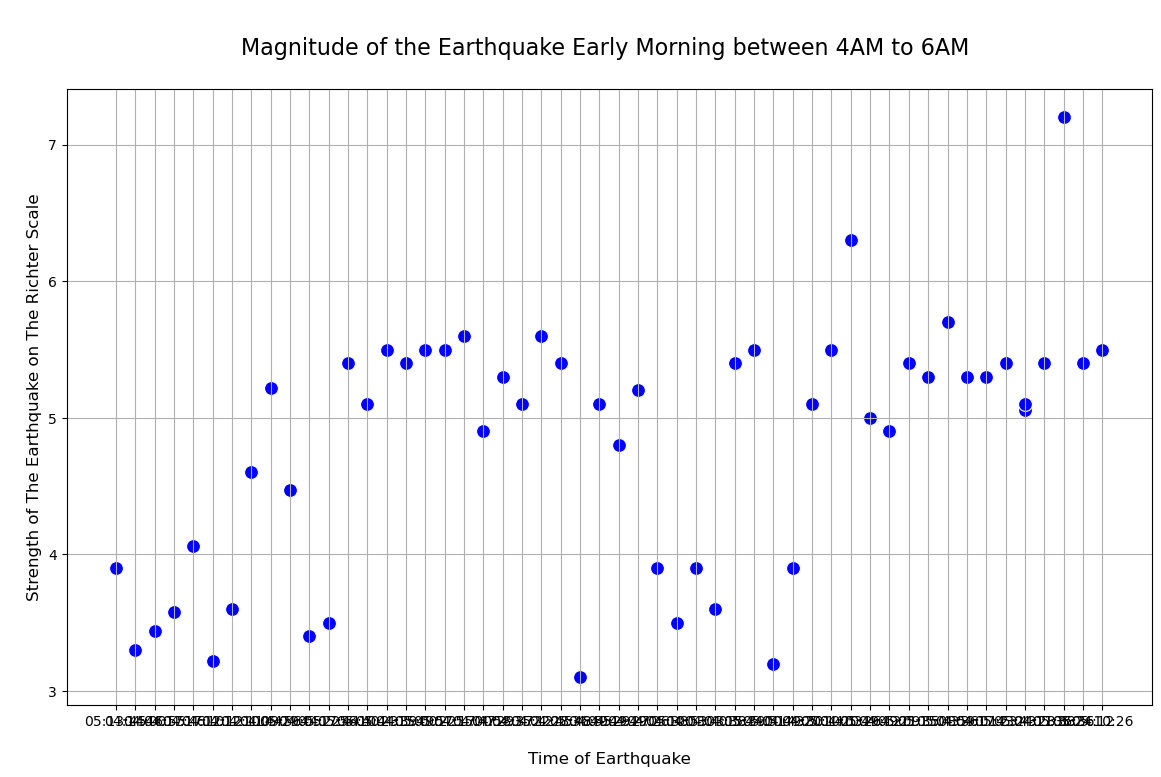

In [84]:
start_time = '04:00:00'
end_time = '06:00:00'
filtered_df = earthquakeDFFinal[(earthquakeDFFinal['Time'] >= start_time) & (earthquakeDFFinal['Time'] <= end_time)]
plt.figure(figsize=(14, 8))
sns.scatterplot(x=filtered_df['Time'], y=earthquakeDFFinal['magnitude'], data=earthquakeDFFinal, color="blue", s=100)
plt.title("\nMagnitude of the Earthquake Early Morning between 4AM to 6AM \n", fontsize=16)
plt.xlabel("\nTime of Earthquake", fontsize=12)
plt.ylabel("\nStrength of The Earthquake on The Richter Scale", fontsize=12)
plt.grid(True)
plt.show()

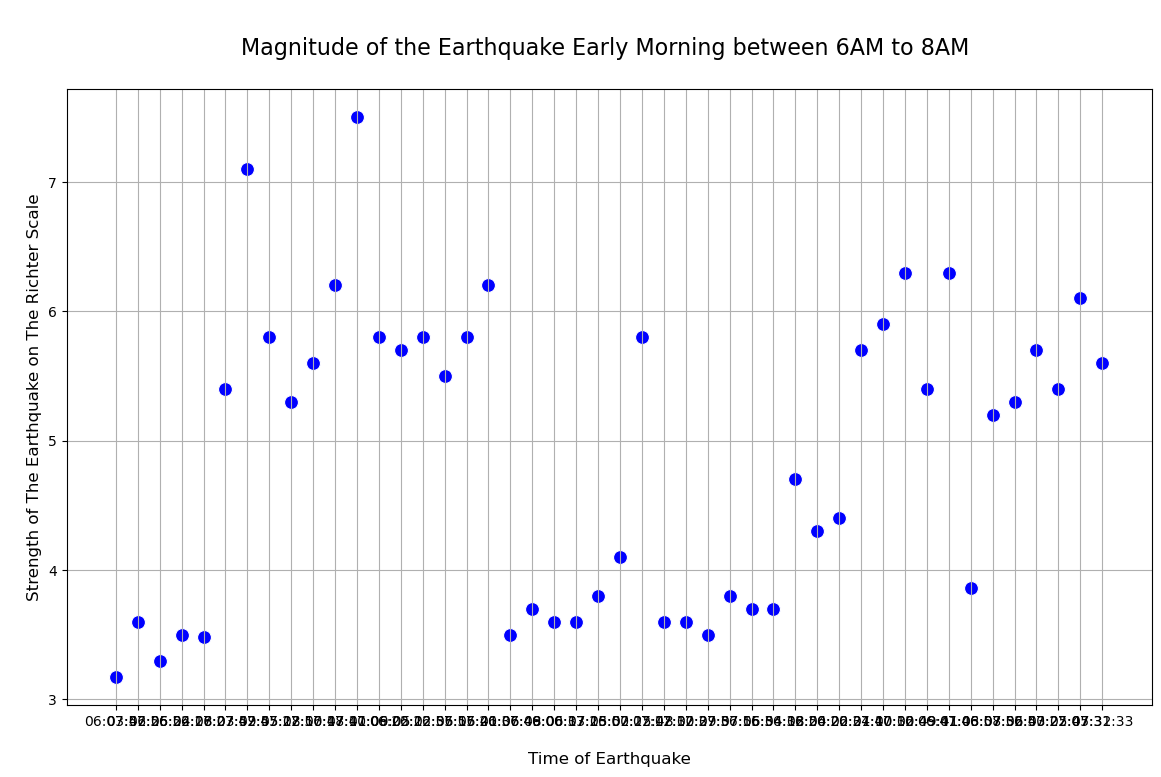

In [86]:
start_time = '06:00:00'
end_time = '08:00:00'
filtered_df = earthquakeDFFinal[(earthquakeDFFinal['Time'] >= start_time) & (earthquakeDFFinal['Time'] <= end_time)]
plt.figure(figsize=(14, 8))
sns.scatterplot(x=filtered_df['Time'], y=earthquakeDFFinal['magnitude'], data=earthquakeDFFinal, color="blue", s=100)
plt.title("\nMagnitude of the Earthquake Early Morning between 6AM to 8AM \n", fontsize=16)
plt.xlabel("\nTime of Earthquake", fontsize=12)
plt.ylabel("\nStrength of The Earthquake on The Richter Scale", fontsize=12)
plt.grid(True)
plt.show()

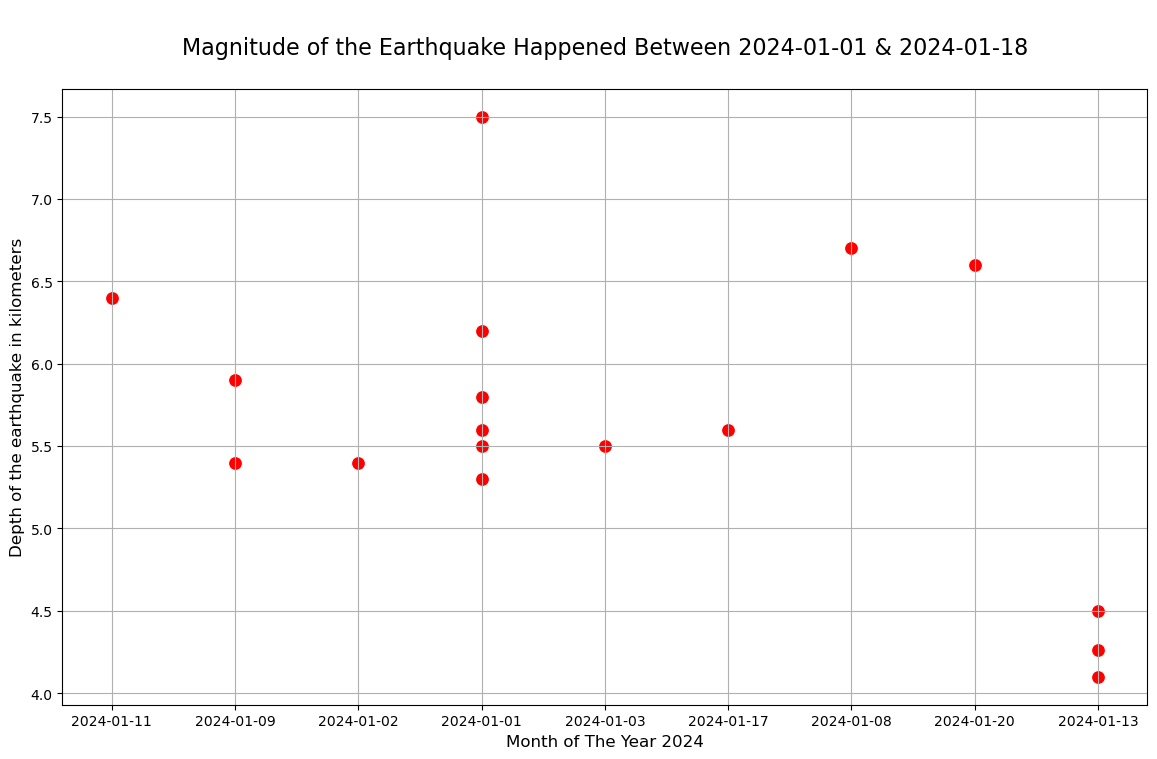

In [88]:
start_date = '2024-01-01'
end_date = '2024-01-20'
filtered_df = earthquakeDFFinal[(earthquakeDFFinal['Date'] >= start_date) & (earthquakeDFFinal['Date'] <= end_date)]
plt.figure(figsize=(14, 8))
sns.scatterplot(x=filtered_df['Date'], y=earthquakeDFFinal['magnitude'], data=earthquakeDFFinal, color="red", s=100)
plt.title("\nMagnitude of the Earthquake Happened Between 2024-01-01 & 2024-01-18\n", fontsize=16)
plt.xlabel("Month of The Year 2024", fontsize=12)
plt.ylabel("Depth of the earthquake in kilometers", fontsize=12)
plt.grid(True)
plt.show()

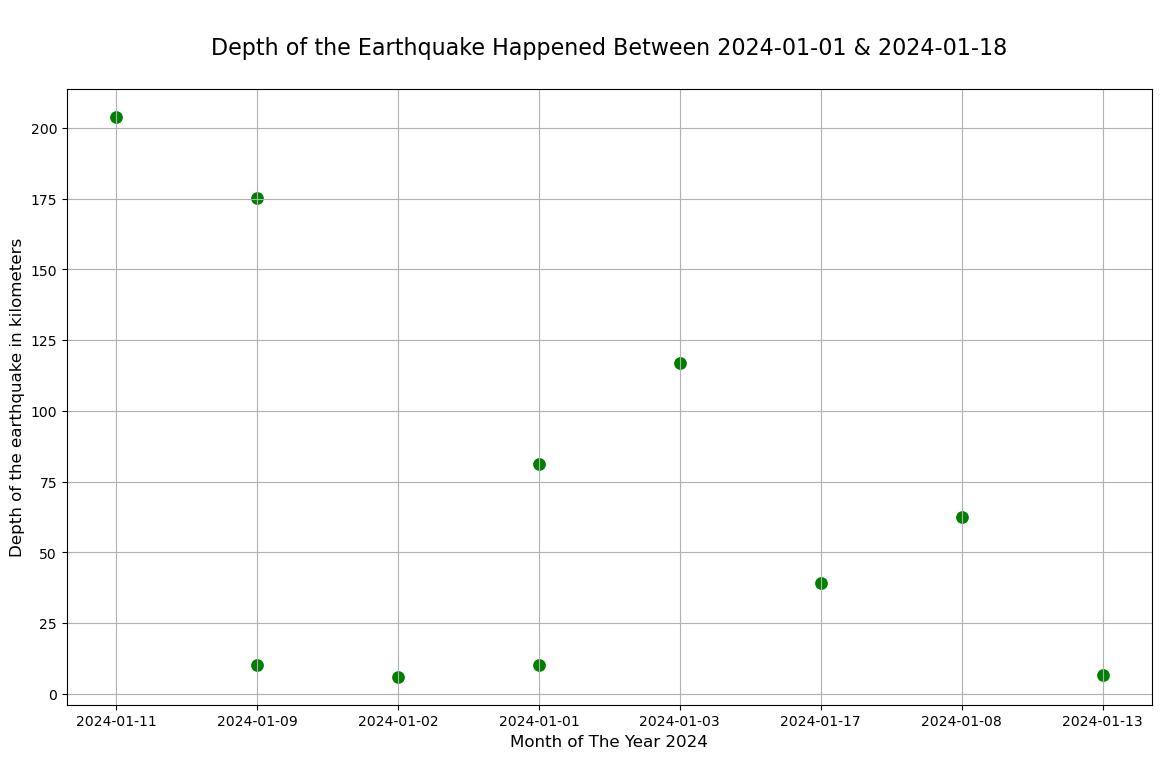

In [90]:
start_date = '2024-01-01'
end_date = '2024-01-18'
filtered_df = earthquakeDFFinal[(earthquakeDFFinal['Date'] >= start_date) & (earthquakeDFFinal['Date'] <= end_date)]
plt.figure(figsize=(14, 8))
sns.scatterplot(x=filtered_df['Date'], y=earthquakeDFFinal['depth'], data=earthquakeDFFinal, color="green", s=100)
plt.title("\nDepth of the Earthquake Happened Between 2024-01-01 & 2024-01-18\n", fontsize=16)
plt.xlabel("Month of The Year 2024", fontsize=12)
plt.ylabel("Depth of the earthquake in kilometers", fontsize=12)
plt.grid(True)
plt.show()

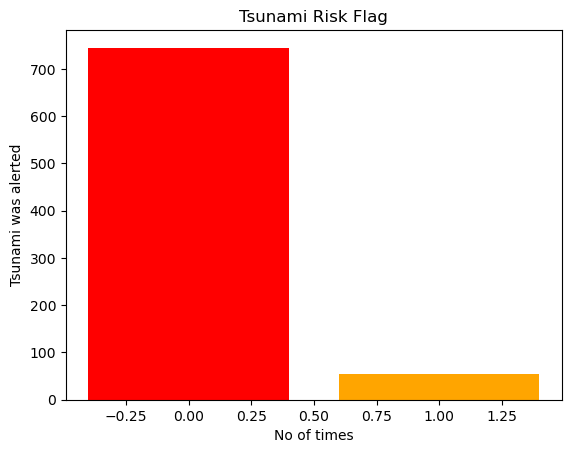

In [92]:
earthquakeDFFinal['tsunami'].value_counts()
plt.bar(earthquakeDFFinal['tsunami'].value_counts().index, earthquakeDFFinal['tsunami'].value_counts().values, color=['Red', 'orange'])
plt.title('Tsunami Risk Flag')
plt.xlabel('No of times')
plt.ylabel('Tsunami was alerted')
plt.show()


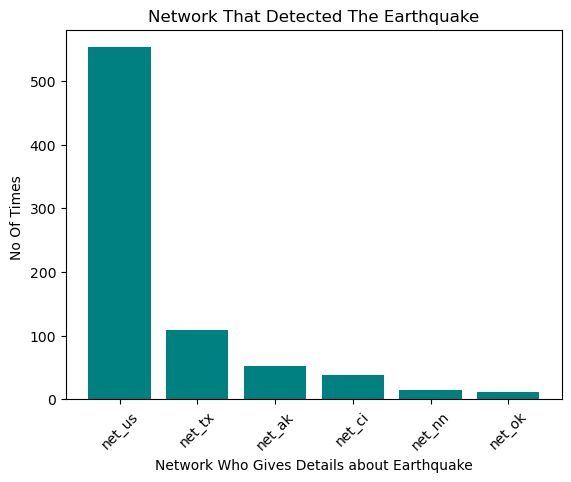

In [94]:
column_totals = earthquakeDFFinal[['net_us', 'net_tx', 'net_ak', 'net_ci', 'net_nn', 'net_ok']].sum()
plt.bar(column_totals.index, column_totals.values, color='teal')
plt.title('Network That Detected The Earthquake')
plt.xlabel('Network Who Gives Details about Earthquake')
plt.ylabel('No Of Times ')
plt.xticks(rotation=45)
plt.show()

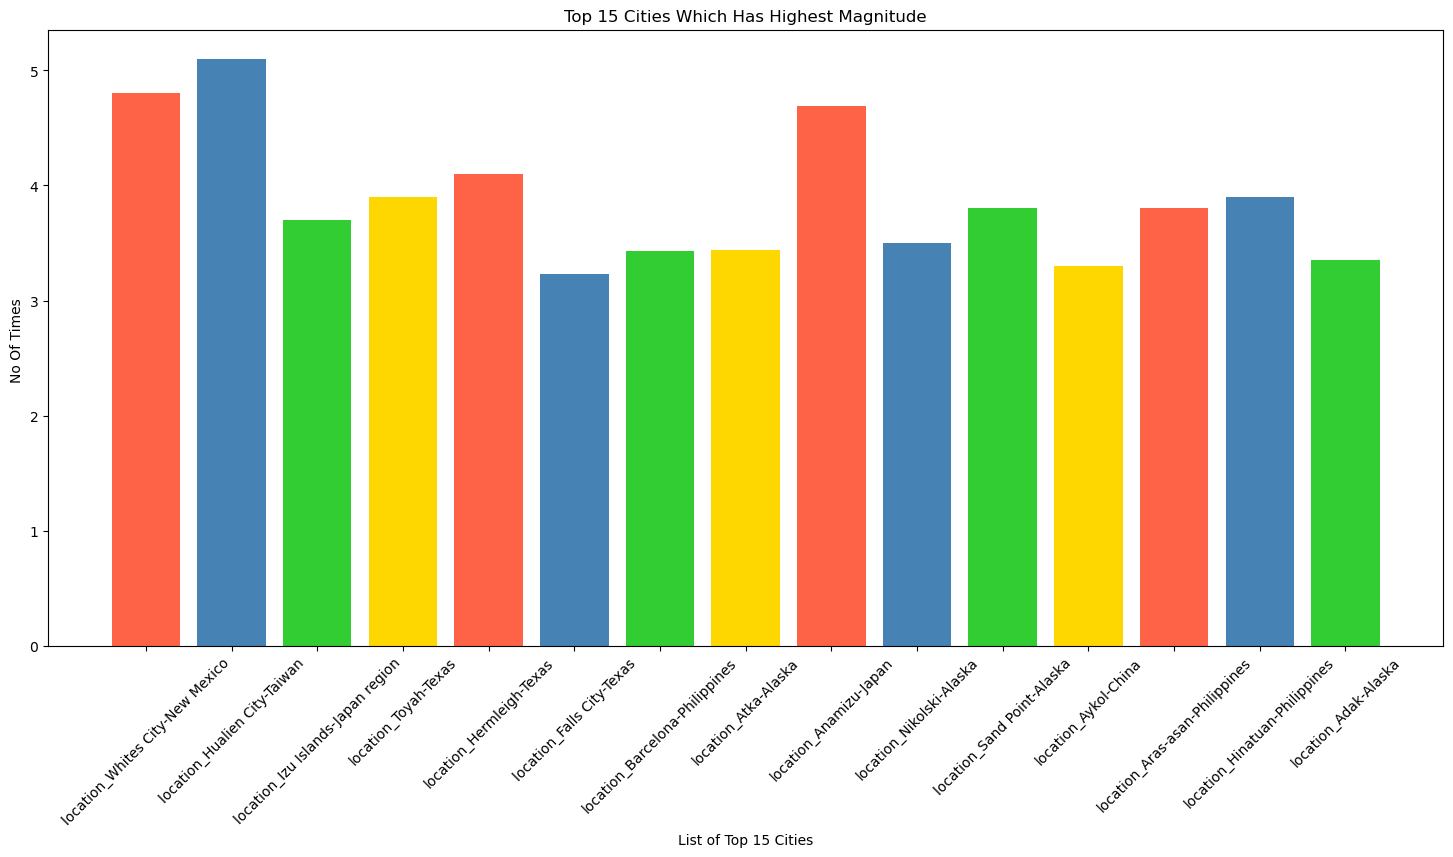

In [96]:
column_totals = earthquakeDFFinal[['location_Whites City-New Mexico','location_Hualien City-Taiwan','location_Izu Islands-Japan region','location_Toyah-Texas','location_Hermleigh-Texas','location_Falls City-Texas','location_Barcelona-Philippines','location_Atka-Alaska','location_Anamizu-Japan','location_Nikolski-Alaska','location_Sand Point-Alaska','location_Aykol-China','location_Aras-asan-Philippines',
'location_Hinatuan-Philippines','location_Adak-Alaska']].sum()
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700'] 
plt.figure(figsize=(18,8))
plt.bar(column_totals.index, earthquakeDFFinal['magnitude'].values[:15], color=colors)
plt.title('Top 15 Cities Which Has Highest Magnitude')
plt.xlabel('List of Top 15 Cities')
plt.ylabel('No Of Times ')
plt.xticks(rotation=45)
plt.show()

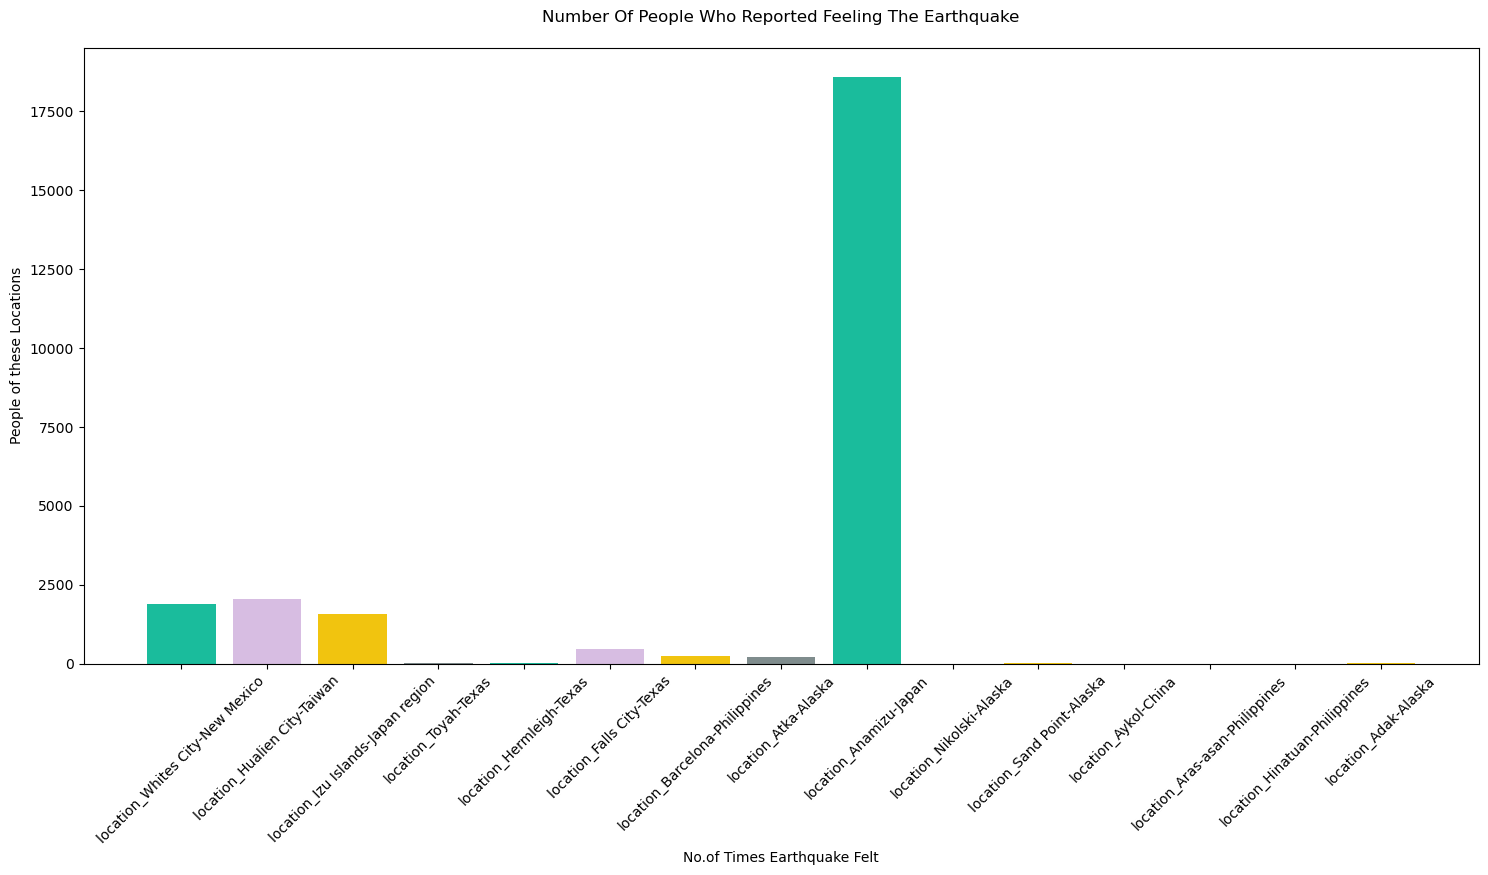

In [98]:
column_totals = earthquakeDFFinal[['location_Whites City-New Mexico','location_Hualien City-Taiwan','location_Izu Islands-Japan region','location_Toyah-Texas','location_Hermleigh-Texas','location_Falls City-Texas','location_Barcelona-Philippines','location_Atka-Alaska','location_Anamizu-Japan','location_Nikolski-Alaska','location_Sand Point-Alaska','location_Aykol-China','location_Aras-asan-Philippines',
'location_Hinatuan-Philippines','location_Adak-Alaska']].sum()
# column_totals = earthquakeDFFinal[['felt']].sum()
colors = ['#1abc9c', '#d7bde2', '#f1c40f', '#7f8c8d'] 
plt.figure(figsize=(18,8))
plt.bar(column_totals.index, earthquakeDFFinal['felt'].values[:15], color=colors)
plt.title('Number Of People Who Reported Feeling The Earthquake\n')
plt.xlabel('No.of Times Earthquake Felt')
plt.ylabel('People of these Locations')
plt.xticks(rotation=45)
plt.show()

In [100]:
threshold = 7
high_magnitude_locations = earthquakeDFFinal[earthquakeDFFinal["magnitude"] >= threshold]
mag=high_magnitude_locations['magnitude'].value_counts()
lon=high_magnitude_locations['longitude']
lat=high_magnitude_locations['latitude']
location_columns = [col for col in high_magnitude_locations.columns if "location_" in col]
# location_columns

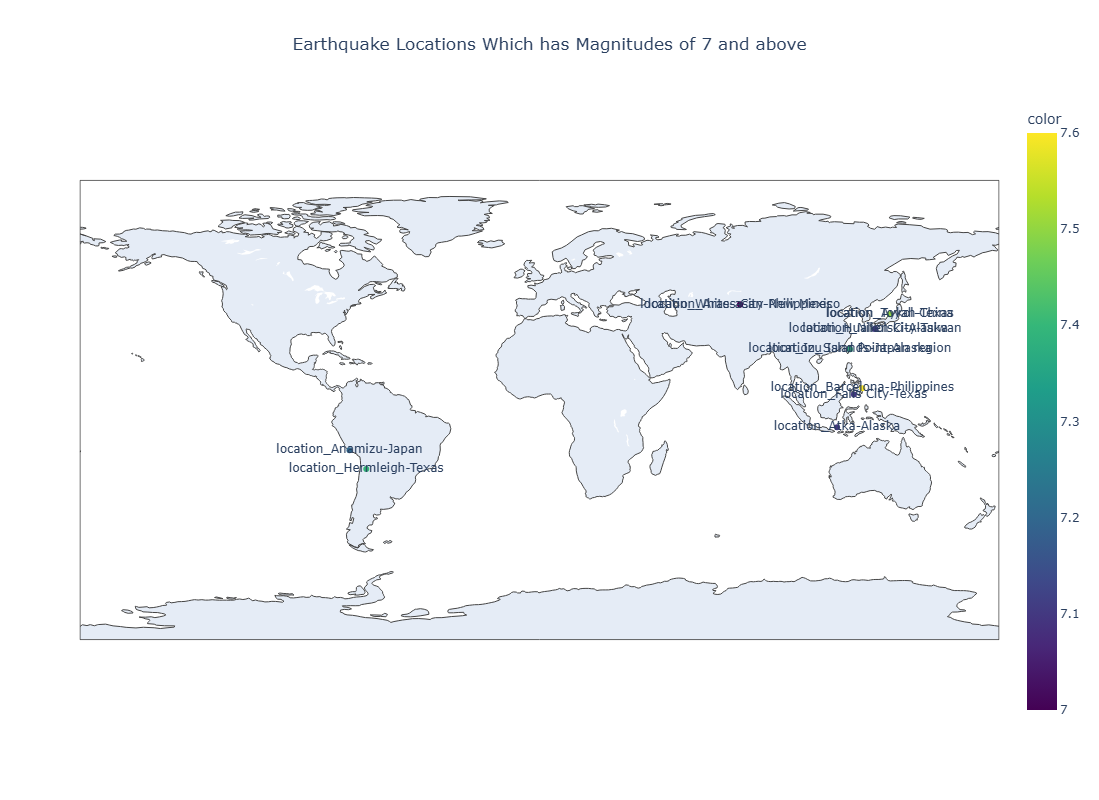

In [102]:
import plotly.express as px
texts = ['location_Whites City-New Mexico',
 'location_Hualien City-Taiwan',
 'location_Izu Islands-Japan region',
 'location_Toyah-Texas',
 'location_Hermleigh-Texas',
 'location_Falls City-Texas',
 'location_Barcelona-Philippines',
 'location_Atka-Alaska',
 'location_Anamizu-Japan',
 'location_Nikolski-Alaska',
 'location_Sand Point-Alaska',
 'location_Aykol-China',
 'location_Aras-asan-Philippines']
texts
threshold = 7
high_magnitude_locations = earthquakeDFFinal[earthquakeDFFinal["magnitude"] >= threshold]
mag=high_magnitude_locations['magnitude']
lon=high_magnitude_locations['longitude']
lat=high_magnitude_locations['latitude']

fig = px.scatter_geo(lat=lat, lon=lon, text=texts, color=mag,color_continuous_scale="Viridis",title="Earthquake Locations with Magnitudes",)
fig.update_layout(
    title="Earthquake Locations Which has Magnitudes of 7 and above",
    title_x=0.5,
    width=800,
    height=800)
fig.show()

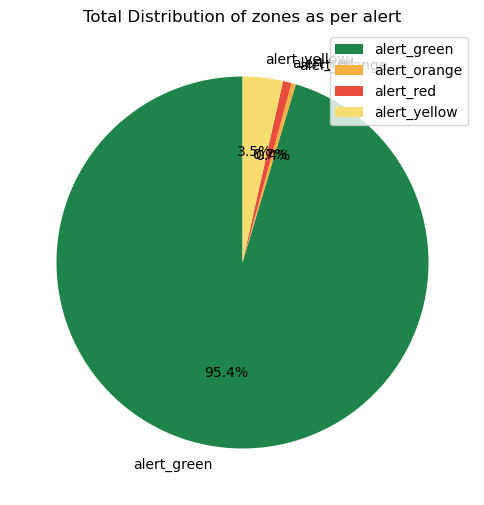

In [104]:
column_sums = earthquakeDFFinal[['alert_green', 'alert_orange', 'alert_red', 'alert_yellow']].sum()
colors = ['#1e8449',  '#f5b041','#e74c3c','#f7dc6f'] 
plt.figure(figsize=(6, 8))
column_sums.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, legend=True)
plt.title('Total Distribution of zones as per alert')
plt.ylabel('')  # Hides the y-label for a cleaner look
plt.show()

#### ===================================

### Performing PCA to reduce the Dimention of the DataFrame.

### Standardizeing the data

In [106]:
maineqDF3['Date']= maineqDF3['Date'].astype(str).str.replace('-', '').astype('int32')
maineqDF3['Time']= maineqDF3['Time'].astype(str).str.replace(':', '').astype('int32')

In [108]:
scaler = StandardScaler()
scaled_Data= scaler.fit_transform(earthquakeDFFinal)
scaled_Data.shape

(800, 63)

In [110]:
X = earthquakeDFFinal.drop(['locality'], axis=1)
y = earthquakeDFFinal['locality']

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=43)

In [114]:
#applying PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [116]:
prop_var=pca.explained_variance_ratio_
prop_var

array([0.98546371])

In [118]:
from sklearn.ensemble import RandomForestRegressor

rfModel = RandomForestRegressor(n_estimators=120, random_state=42)

# Train the model
rfModel.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120, random_state=42)

In [120]:
y_pred = rfModel.predict(X_test)

In [122]:
print("Accuracy Score ===============>> %.2f" % rfModel.score(X_train, y_train))

Accuracy Score ===============>> 0.86


In [134]:
y_pred

array([155.05833333, 136.95833333,  58.975     , 161.13333333,
        58.6       , 145.91666667,  84.475     ,  87.55833333,
       164.675     ,  71.36666667,  72.6       , 105.5       ,
        65.56666667, 166.81666667, 186.125     , 149.075     ,
       130.80833333,  60.775     ,  25.58333333, 137.03333333,
       208.25833333,  62.86666667,  83.85      , 154.48333333,
        39.51666667,  41.55833333,  61.53333333, 157.25      ,
        79.525     ,  94.25      ,  91.48333333, 160.44166667,
        58.76666667, 112.70833333, 145.75      ,  55.56666667,
       146.375     ,  59.63333333,  54.76666667, 161.35833333,
       153.525     ,  47.025     ,  74.35833333,  39.5       ,
        49.51666667,  46.21666667,  48.85833333,  48.85833333,
       149.45833333, 122.93333333,  52.025     ,  42.775     ,
        52.81666667,  52.05833333,  90.775     , 128.44166667,
        94.25      ,  90.44166667, 123.8       ,  98.19166667,
       163.225     ,  96.96666667,  64.59166667, 122.7 

In [124]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display the results
print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.3028693973897544
Mean Squared Error (MSE): 3095.5657144097217
Root Mean Squared Error (RMSE): 55.63780831781318


In [132]:
rfModel.feature_importances_

array([1.])

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
FinalDF['locality'] = label_encoder.fit_transform(FinalDF['locality'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# FinalDF

In [504]:
numeric_FinalDF = FinalDF.select_dtypes(include=['number'])
# numeric_FinalDF

In [829]:
X = maineqDF3.drop(['locality','Date','Time'],axis=1)   #Feature Matrix
y = maineqDF3["locality"] 

In [833]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((560, 66), (240, 66))

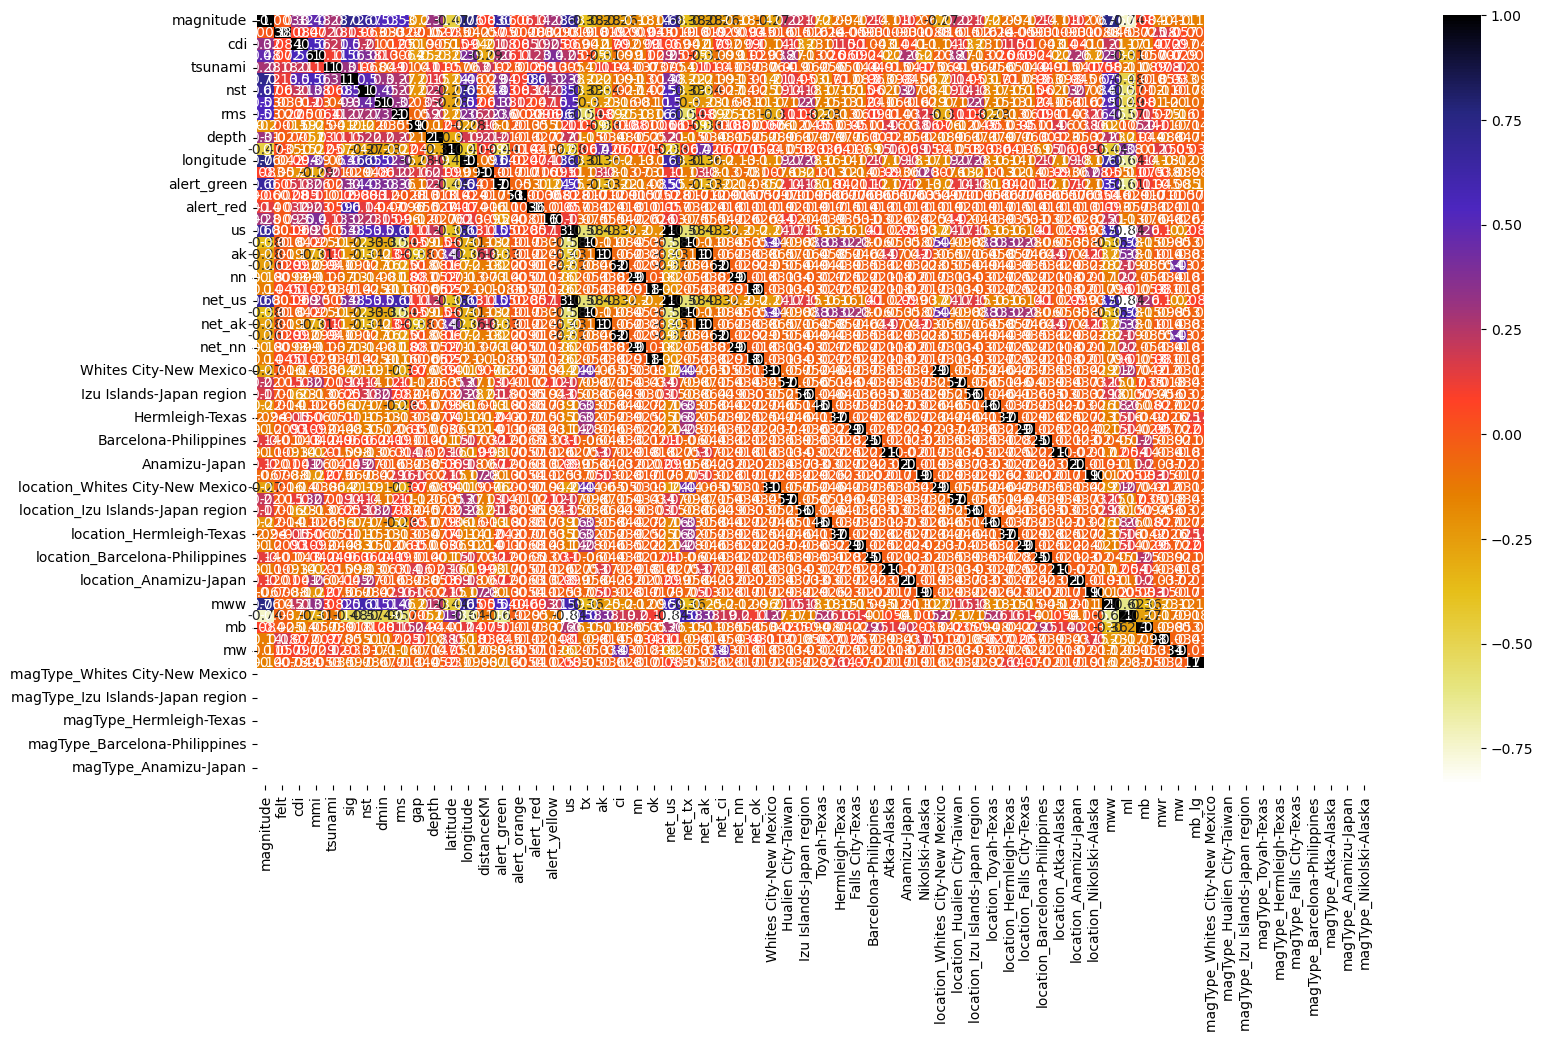

In [843]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(18,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [837]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [839]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

20

In [841]:
corr_features

{'location_Anamizu-Japan',
 'location_Atka-Alaska',
 'location_Barcelona-Philippines',
 'location_Falls City-Texas',
 'location_Hermleigh-Texas',
 'location_Hualien City-Taiwan',
 'location_Izu Islands-Japan region',
 'location_Nikolski-Alaska',
 'location_Toyah-Texas',
 'location_Whites City-New Mexico',
 'longitude',
 'ml',
 'mww',
 'net_ak',
 'net_ci',
 'net_nn',
 'net_ok',
 'net_tx',
 'net_us',
 'sig'}